In [1]:
import os
import sys

#this part is used for pyspark submit
os.environ['PYSPARK_SUBMIT_ARGS']='\
--verbose \
--master=yarn \
--deploy-mode=client \
pyspark-shell'

os.environ['JAVA_HOME']='/usr/lib/jvm/java-8-openjdk-amd64/'
os.environ['YARN_CONF_DIR']='/etc/alternatives/hadoop-conf/'

#this line is used for spark1.6
#os.environ['SPARK_HOME']='/opt/cloudera/parcels/CDH/lib/spark'

#this line is used for spark2.2
os.environ['SPARK_HOME']='/opt/cloudera/parcels/SPARK2-2.2.0.cloudera2-1.cdh5.12.0.p0.232957/lib/spark2'

# this line is used for python2.7
#os.environ['PYSPARK_PYTHON']='/usr/bin/python'

#this line is used for python3.5
os.environ['PYSPARK_PYTHON']='/usr/bin/python3'

spark_home = os.environ.get('SPARK_HOME', None)
sys.path.insert(0, os.path.join(spark_home, 'python'))
sys.path.insert(0, os.path.join(spark_home, 'python/lib/py4j-0.10.4-src.zip'))  
#execfile(os.path.join(spark_home, 'python/pyspark/shell.py'))
exec(open(os.path.join(spark_home, 'python/pyspark/shell.py')).read())

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.2.0.cloudera2
      /_/

Using Python version 3.5.2 (default, Nov 23 2017 16:37:01)
SparkSession available as 'spark'.


In [2]:
import pyspark
sc_ = SparkSession.builder.appName('app').getOrCreate()

df = sc_.read.format('csv').option('header', 'true').option('inferSchema','true').load('/user/team6/homework_2/WaferLog.csv')
df.head(1)
df.printSchema()


df_Yield = sc_.read.format('csv').option('header', 'true').option('inferSchema','true').load('/user/team6/homework_1/Yield.csv')
df_Yield.head(1)
df_Yield.printSchema()


root
 |-- _c0: integer (nullable = true)
 |-- Lot.ID: string (nullable = true)
 |-- Wafer.ID: string (nullable = true)
 |-- Process.stage: string (nullable = true)
 |-- Process: string (nullable = true)
 |-- Tool.ID: string (nullable = true)
 |-- Time: timestamp (nullable = true)
 |-- Action: string (nullable = true)

root
 |-- wafer_id: string (nullable = true)
 |-- yield: double (nullable = true)



In [3]:
from pyspark.sql.functions import col

df = df.withColumnRenamed('Wafer.ID', 'Wafer_ID').withColumnRenamed('Process.stage', 'Process_stage').withColumnRenamed('Tool.ID', 'Tool_ID')
#df_null = df.where(df.Process_stage.isNull())
'''
mini = [col("Wafer_ID"),col("Process_stage").cast("Integer"),col("Tool_ID")]
df_mini = df.select(mini)
df_mini.printSchema()
df_mini.show()
'''
merge_df = df_Yield.join(df, 'Wafer_ID', 'inner').drop('wafer_id')
merge_df.show()

+----------------+---+------+-------------+---------+-------+-------------------+-----------+
|           yield|_c0|Lot.ID|Process_stage|  Process|Tool_ID|               Time|     Action|
+----------------+---+------+-------------+---------+-------+-------------------+-----------+
|77.8337709834567|  1|LT0154|          107|Process-E| ToolE4|2017-05-23 09:01:27|LOGOUT_TOOL|
|75.0953333590223|  2|LT0154|          107|Process-E| ToolE4|2017-05-23 09:01:27|LOGOUT_TOOL|
|74.7096563405234|  3|LT0154|          107|Process-E| ToolE4|2017-05-23 09:01:27|LOGOUT_TOOL|
|77.9369207282814|  4|LT0154|          107|Process-E| ToolE4|2017-05-23 09:01:27|LOGOUT_TOOL|
|75.5698629056755|  5|LT0154|          107|Process-E| ToolE4|2017-05-23 09:01:27|LOGOUT_TOOL|
|78.0603762096826|  6|LT0154|          107|Process-E| ToolE4|2017-05-23 09:01:27|LOGOUT_TOOL|
|73.5653836685027|  7|LT0154|          107|Process-E| ToolE4|2017-05-23 09:01:27|LOGOUT_TOOL|
|74.8653574180756|  8|LT0154|          107|Process-E| ToolE4

now stage 1
tool_ID: A1 empty
tool_ID: A2 empty
tool_ID: A3 empty
tool_ID: A4 empty
tool_ID: A5 empty
tool_ID: A6 empty
tool_ID: A7 empty
tool_ID: A8 empty
tool_ID: A9 empty
tool_ID: A10 empty
tool_ID: A11 empty
tool_ID: A12 empty
tool_ID: A13 empty
tool_ID: A14 empty
tool_ID: A15 empty
tool_ID: B1 empty
tool_ID: B2 empty
tool_ID: B3 empty
tool_ID: B4 empty
tool_ID: B5 empty
tool_ID: B6 empty
tool_ID: B7 empty
tool_ID: B8 empty
tool_ID: B9 empty
tool_ID: B10 empty
tool_ID: B11 empty
tool_ID: B12 empty
tool_ID: B13 empty
tool_ID: B14 empty
tool_ID: B15 empty
tool_ID: C1
tool_ID: C2
tool_ID: C3
tool_ID: C4
tool_ID: C5
tool_ID: C6
tool_ID: C7
tool_ID: C8
tool_ID: C9
tool_ID: C10 empty
tool_ID: C11 empty
tool_ID: C12 empty
tool_ID: C13 empty
tool_ID: C14 empty
tool_ID: C15 empty
tool_ID: D1 empty
tool_ID: D2 empty
tool_ID: D3 empty
tool_ID: D4 empty
tool_ID: D5 empty
tool_ID: D6 empty
tool_ID: D7 empty
tool_ID: D8 empty
tool_ID: D9 empty
tool_ID: D10 empty
tool_ID: D11 empty
tool_ID: D12 e

ValueError: max() arg is an empty sequence

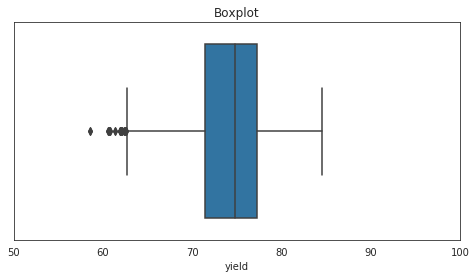

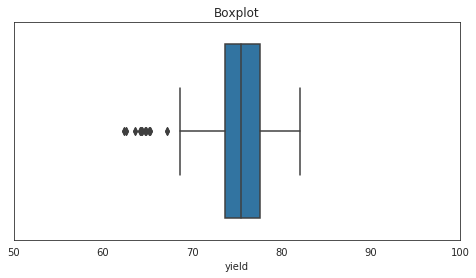

<Figure size 576x288 with 0 Axes>

In [4]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline                 
sns.set_style("white")             

#letter = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
letter = ['A','B','C','D','E','F','G',]
#letter = ['E']

median_gap_dataframe = list()
median_gap_value = list()
for k in range(1,3):
    print("now stage",k)
    max_stage_median_gap = 0
    max_stage_median_gap_dataframe = 0
    stage_df = merge_df.where("Process_stage = "+str(k))
    stage_median = stage_df.approxQuantile("yield", [0.5], 0.25)[0]
    for i in range(len(letter)):
        for j in range(1,16):
            
            tmp_df = merge_df.where("Process_stage = "+str(k)).where("Tool_ID = 'Tool" + letter[i] + str(j) + "'")
            if len(tmp_df.head(1)) == 0:
                print("tool_ID: " + letter[i] + str(j) + " empty")
                continue
            else:
                print("tool_ID: " + letter[i] + str(j))
                median = tmp_df.approxQuantile("yield", [0.5], 0.25)[0]
                #print(median)
                median_gap = abs(median-stage_median)
                if median_gap > max_stage_median_gap:
                    max_stage_median_gap =  median_gap
                    max_stage_median_gap_dataframe = tmp_df
                   
    median_gap_dataframe.append(max_stage_median_gap_dataframe)
    median_gap_value.append(max_stage_median_gap)


for i in range(5):
    fig = plt.figure(figsize=(8, 4))
    max_median_gap = max(median_gap_value)
    index = median_gap_value.index(max(median_gap_value))
    
    print(max_median_gap)

    ax1 = fig.add_subplot(111)
    sns.boxplot(data=median_gap_dataframe[index].toPandas(),x="yield", ax=ax1)
    ax1.set_xlim(50, 100)
    ax1.set_title("Boxplot")
    
    median_gap_value.pop(index)
    median_gap_dataframe.pop(index)
    
               
               
               

now stage 10
tool_ID: D1 empty
tool_ID: D2 empty
tool_ID: D3 empty
tool_ID: D4 empty
tool_ID: D5 empty
tool_ID: D6 empty
tool_ID: D7 empty
tool_ID: D8 empty
tool_ID: D9 empty
tool_ID: D10 empty
tool_ID: D11 empty
tool_ID: D12 empty
tool_ID: D13 empty
tool_ID: D14 empty
tool_ID: D15 empty
tool_ID: E1 empty
tool_ID: E2 empty
tool_ID: E3 empty
tool_ID: E4 empty
tool_ID: E5 empty
tool_ID: E6 empty
tool_ID: E7 empty
tool_ID: E8 empty
tool_ID: E9 empty
tool_ID: E10 empty
tool_ID: E11 empty
tool_ID: E12 empty
tool_ID: E13 empty
tool_ID: E14 empty
tool_ID: E15 empty
tool_ID: F1 empty
tool_ID: F2 empty
tool_ID: F3 empty
tool_ID: F4 empty
tool_ID: F5 empty
tool_ID: F6 empty
tool_ID: F7 empty
tool_ID: F8 empty
tool_ID: F9 empty
tool_ID: F10 empty
tool_ID: F11 empty
tool_ID: F12 empty
tool_ID: F13 empty
tool_ID: F14 empty
tool_ID: F15 empty
tool_ID: G1 empty
tool_ID: G2 empty
tool_ID: G3 empty
tool_ID: G4 empty
tool_ID: G5 empty
tool_ID: G6 empty
tool_ID: G7 empty
tool_ID: G8 empty
tool_ID: G9 emp

tool_ID: I8 empty
tool_ID: I9 empty
tool_ID: I10 empty
tool_ID: I11 empty
tool_ID: I12 empty
tool_ID: I13 empty
tool_ID: I14 empty
tool_ID: I15 empty
0


AttributeError: 'int' object has no attribute 'toPandas'

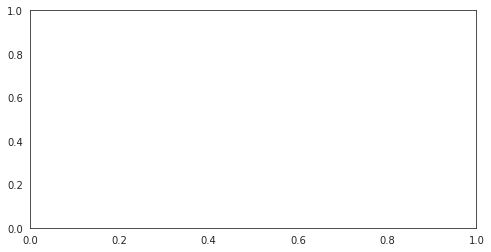

In [4]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline                 
sns.set_style("white")             

#letter = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
letter = ['D','E','F','G','H','I']
#letter = ['E']

median_gap_dataframe = list()
median_gap_value = list()
for k in range(10,15):
    print("now stage",k)
    max_stage_median_gap = 0
    max_stage_median_gap_dataframe = 0
    stage_df = merge_df.where("Process_stage = "+str(k))
    stage_median = stage_df.approxQuantile("yield", [0.5], 0.25)[0]
    for i in range(len(letter)):
        for j in range(1,16):
            
            tmp_df = merge_df.where("Process_stage = "+str(k)).where("Tool_ID = 'Tool" + letter[i] + str(j) + "'")
            if len(tmp_df.head(1)) == 0:
                print("tool_ID: " + letter[i] + str(j) + " empty")
                continue
            else:
                print("tool_ID: " + letter[i] + str(j))
                median = tmp_df.approxQuantile("yield", [0.5], 0.25)[0]
                #print(median)
                median_gap = abs(median-stage_median)
                if median_gap > max_stage_median_gap:
                    max_stage_median_gap =  median_gap
                    max_stage_median_gap_dataframe = tmp_df
                   
    median_gap_dataframe.append(max_stage_median_gap_dataframe)
    median_gap_value.append(max_stage_median_gap)


for i in range(5):
    fig = plt.figure(figsize=(8, 4))
    max_median_gap = max(median_gap_value)
    index = median_gap_value.index(max(median_gap_value))
    
    print(max_median_gap)

    ax1 = fig.add_subplot(111)
    sns.boxplot(data=median_gap_dataframe[index].toPandas(),x="yield", ax=ax1)
    ax1.set_xlim(50, 100)
    ax1.set_title("Boxplot")
    
    median_gap_value.pop(index)
    median_gap_dataframe.pop(index)
    
               